In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Embedding 
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [3]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

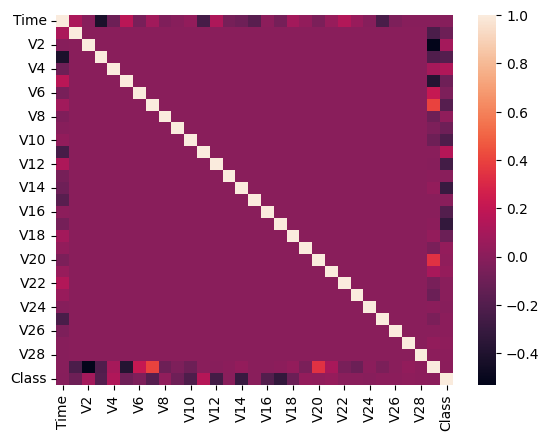

In [7]:
dataplot=sns.heatmap(data.corr())
plt.show()

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [10]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = fraud.append(non_fraud, ignore_index=True)
data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1332\96343452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud, ignore_index=True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,35675.0,1.396176,-0.621270,-0.067202,-0.733794,-0.824685,-0.894205,-0.419026,-0.190651,-0.665767,...,0.182885,0.327008,-0.195201,-0.152022,0.645686,-0.082344,-0.021666,0.008246,45.75,0
980,144818.0,2.036267,-0.221251,-1.275864,0.206250,0.037539,-0.640475,0.006084,-0.095596,0.483928,...,-0.276841,-0.770792,0.275214,-0.523067,-0.306056,0.210892,-0.084081,-0.075933,9.99,0
981,59310.0,-1.166786,1.049818,0.691003,-1.684965,0.243395,-0.008152,0.336826,0.483306,0.113609,...,-0.067100,-0.148496,-0.143091,-0.811430,-0.291082,0.797337,-0.065334,-0.074495,3.84,0
982,141895.0,1.447752,-2.271798,-0.462198,-0.471068,-1.641126,0.198819,-0.934025,0.091875,0.406873,...,0.192995,-0.012986,-0.026953,-0.314448,-0.507686,-0.401999,-0.028769,0.005530,346.71,0


In [13]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [17]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [19]:
X_train.shape

(787, 30)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

# CNN MODEL

In [23]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [24]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 7s 87ms/step - loss: 0.4630 - accuracy: 0.8564 - val_loss: 0.5150 - val_accuracy: 0.9137
Epoch 2/20
25/25 [==============================] - 1s 22ms/step - loss: 0.2125 - accuracy: 0.9377 - val_loss: 0.4630 - val_accuracy: 0.9239
Epoch 3/20
25/25 [==============================] - 0s 19ms/step - loss: 0.2169 - accuracy: 0.9390 - val_loss: 0.4227 - val_accuracy: 0.9188
Epoch 4/20
25/25 [==============================] - 0s 16ms/step - loss: 0.1654 - accuracy: 0.9365 - val_loss: 0.3894 - val_accuracy: 0.9239
Epoch 5/20
25/25 [==============================] - 1s 21ms/step - loss: 0.1874 - accuracy: 0.9352 - val_loss: 0.3769 - val_accuracy: 0.9289
Epoch 6/20
25/25 [==============================] - 1s 21ms/step - loss: 0.1523 - accuracy: 0.9466 - val_loss: 0.3592 - val_accuracy: 0.9391
Epoch 7/20
25/25 [==============================] - 0s 14ms/step - loss: 0.1414 - accuracy: 0.9517 - val_loss: 0.3096 - val_accuracy: 0.9289
Epoch 8/20
25

In [26]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

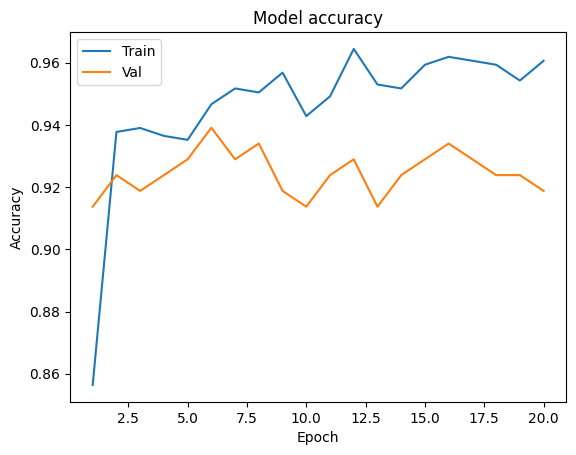

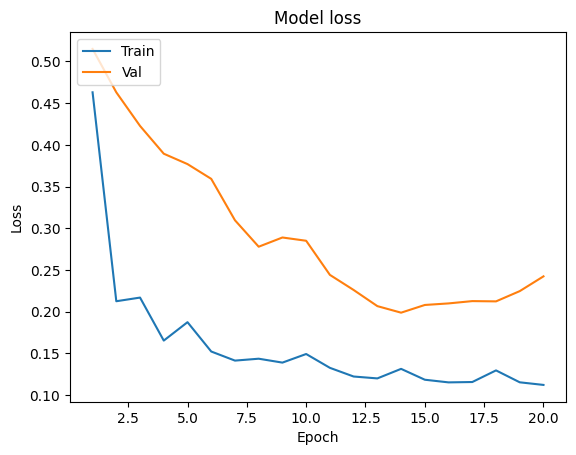

In [27]:
plot_learningCurve(history, epochs)


In [28]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

In [35]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 12ms/step - loss: 0.5689 - accuracy: 0.8132 - val_loss: 0.5525 - val_accuracy: 0.5584
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2544 - accuracy: 0.9022 - val_loss: 0.5630 - val_accuracy: 0.5025
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2068 - accuracy: 0.9263 - val_loss: 0.5823 - val_accuracy: 0.4975
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1888 - accuracy: 0.9276 - val_loss: 0.6078 - val_accuracy: 0.4975
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1672 - accuracy: 0.9403 - val_loss: 0.6984 - val_accuracy: 0.4975
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1619 - accuracy: 0.9365 - val_loss: 0.7021 - val_accuracy: 0.4975
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1405 - accuracy: 0.9517 - val_loss: 0.7343 - val_accuracy: 0.4975
Epoch 8/50
25/25 [=

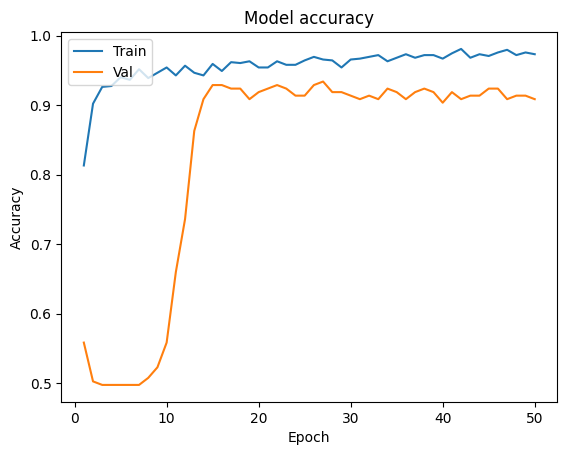

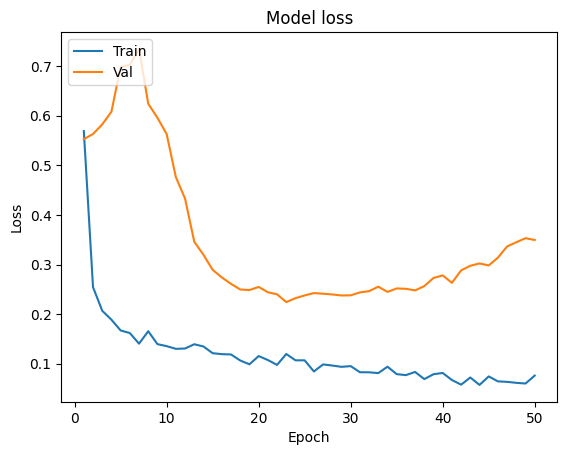

In [37]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, epochs)


# Adding MaxPool Layer

Epoch 1/50
25/25 [==============================] - 4s 30ms/step - loss: 0.5877 - accuracy: 0.7408 - val_loss: 0.5620 - val_accuracy: 0.8477
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.3311 - accuracy: 0.8704 - val_loss: 0.5066 - val_accuracy: 0.8629
Epoch 3/50
25/25 [==============================] - 0s 13ms/step - loss: 0.3050 - accuracy: 0.8844 - val_loss: 0.4616 - val_accuracy: 0.8883
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 0.2693 - accuracy: 0.9136 - val_loss: 0.4165 - val_accuracy: 0.9036
Epoch 5/50
25/25 [==============================] - 0s 13ms/step - loss: 0.2259 - accuracy: 0.9174 - val_loss: 0.3729 - val_accuracy: 0.9086
Epoch 6/50
25/25 [==============================] - 0s 13ms/step - loss: 0.2303 - accuracy: 0.9238 - val_loss: 0.3304 - val_accuracy: 0.9086
Epoch 7/50
25/25 [==============================] - 0s 13ms/step - loss: 0.2157 - accuracy: 0.9187 - val_loss: 0.2985 - val_accuracy: 0.9086
Epoch 8/50
25

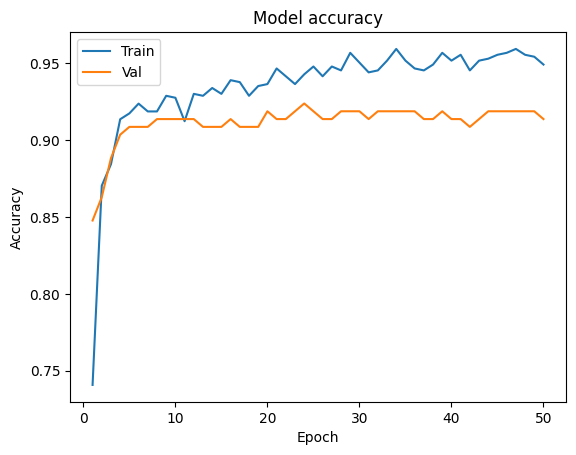

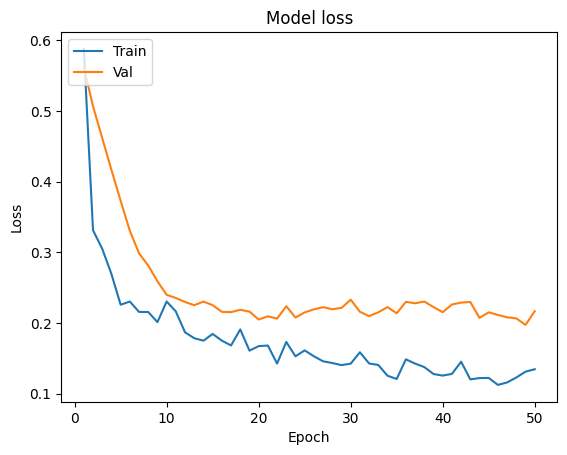

In [26]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

# Architecture of 14 Layers

In [27]:
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_7 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 28, 64)           

In [29]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 5s 33ms/step - loss: 0.3987 - accuracy: 0.8272 - val_loss: 0.5518 - val_accuracy: 0.8985
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.2461 - accuracy: 0.9123 - val_loss: 0.4877 - val_accuracy: 0.9340
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.2070 - accuracy: 0.9327 - val_loss: 0.4258 - val_accuracy: 0.9188
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.1922 - accuracy: 0.9288 - val_loss: 0.4292 - val_accuracy: 0.7614
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.1903 - accuracy: 0.9314 - val_loss: 0.3944 - val_accuracy: 0.8883
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.1675 - accuracy: 0.9403 - val_loss: 0.3480 - val_accuracy: 0.9188
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.1519 - accuracy: 0.9466 - val_loss: 0.3853 - val_accuracy: 0.7970
Epoch 

# Architecture of 17 Layers

In [47]:
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_22 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_23 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_23 (Bat  (None, 28, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 28, 64)          

In [50]:
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 20ms/step - loss: 0.1232 - accuracy: 0.9733 - val_loss: 0.5547 - val_accuracy: 0.9188
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1233 - accuracy: 0.9809 - val_loss: 0.5359 - val_accuracy: 0.9239
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1172 - accuracy: 0.9822 - val_loss: 0.5835 - val_accuracy: 0.9137
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1287 - accuracy: 0.9746 - val_loss: 0.5435 - val_accuracy: 0.9239
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1063 - accuracy: 0.9848 - val_loss: 0.6482 - val_accuracy: 0.9137
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.1308 - accuracy: 0.9771 - val_loss: 0.5573 - val_accuracy: 0.9239
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.1111 - accuracy: 0.9797 - val_loss: 0.5824 - val_accuracy: 0.9239
Epoch 

# Architecture of 20 Layers

In [31]:
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_8 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 28, 64)           

In [32]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 7s 47ms/step - loss: 0.5069 - accuracy: 0.7421 - val_loss: 0.6665 - val_accuracy: 0.5228
Epoch 2/100
25/25 [==============================] - 1s 24ms/step - loss: 0.2991 - accuracy: 0.8971 - val_loss: 0.5551 - val_accuracy: 0.8071
Epoch 3/100
25/25 [==============================] - 1s 23ms/step - loss: 0.2367 - accuracy: 0.9098 - val_loss: 0.4415 - val_accuracy: 0.9188
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 0.2317 - accuracy: 0.9136 - val_loss: 0.3537 - val_accuracy: 0.9137
Epoch 5/100
25/25 [==============================] - 1s 25ms/step - loss: 0.2033 - accuracy: 0.9314 - val_loss: 0.2989 - val_accuracy: 0.9188
Epoch 6/100
25/25 [==============================] - 1s 21ms/step - loss: 0.2117 - accuracy: 0.9288 - val_loss: 0.2739 - val_accuracy: 0.9137
Epoch 7/100
25/25 [==============================] - 1s 23ms/step - loss: 0.1817 - accuracy: 0.9314 - val_loss: 0.2734 - val_accuracy: 0.9137
Epoch 